## Importing Data and Cleaning

In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt


In [ ]:
# read in data file
softball_df = pd.read_csv("NCAA Statistics.csv")

#viewing the dataframe
softball_df

Team Conference  SOS  Prev SOS  Adj. RPI  Adj. RPI Value  RPI  \
0          Tennessee        SEC    1         1        12         0.65470    9   
1             Oregon     Pac-12    2         2        17         0.63733   16   
2                LSU        SEC    3         3        22         0.63004   20   
3            Clemson        ACC    4         5         8         0.66091   10   
4    Mississippi St.        SEC    5         4        30         0.60545   29   
..               ...        ...  ...       ...       ...             ...  ...   
296      Alabama A&M       SWAC  297       297       283         0.38898  288   
297   Texas Southern       SWAC  298       298       244         0.42834  246   
298     Prairie View       SWAC  299       299       285         0.38633  285   
299      Norfolk St.       MEAC  300       300       255         0.42167  245   
300        Grambling       SWAC  301       301       297         0.35945  297   

     RPI Value     WL  Adj. Non-Conf RPI  ... Last 10 Games  RPI 1-25  \
0      0.64140  39-16                 16  ...           7-3      8-12   
1      0.62193  31-17                  5  ...           6-4      0-11   
2      0.61534  34-21                 22  ...           5-5      7-15   
3      0.63921  39-15                 13  ...           6-4     10-13   
4      0.59845  33-24                 36  ...           4-6      8-16   
..         ...    ...                ...  ...           ...       ...   
296    0.39038  14-24                259  ...           6-4       0-0   
297    0.43324  24-20                287  ...           7-3       0-0   
298    0.39473  20-28                297  ...           8-2       0-0   
299    0.43357  32-23                266  ...           4-6       0-0   
300    0.36505  13-23                301  ...           3-7       0-0   

    RPI 26-50 RPI 51-100 RPI 101+ vs TOP 100 vs below 150 NC SOS NC SOS Value  \
0        11-4        7-0     13-0      26-16          9-0     10      0.60414   
1         9-4       14-2      8-0      23-17          2-0      3      0.61828   
2        10-4        9-2      8-0      26-21          2-0      9      0.60423   
3         9-2        9-0     11-0      28-15          9-0     66      0.54792   
4         4-2       10-4     11-2      22-22          8-1     36      0.57096   
..        ...        ...      ...        ...          ...    ...          ...   
296       0-0        0-3    14-21        0-3        14-20    266      0.42804   
297       0-4        0-2    24-14        0-6        24-13    201      0.47549   
298       0-0        0-3    20-25        0-3        20-23    232      0.45500   
299       0-0        0-3    32-20        0-3        32-18    296      0.37751   
300       0-0        0-0    13-23        0-0        13-19    273      0.41758   

    advanced  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
296        0  
297        0  
298        1  
299        0  
300        0  

[301 rows x 24 columns]

### Data Cleaning

In [ ]:
#Check for and remove outliers
from scipy import stats
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
softball_df[(np.abs(stats.zscore(softball_df.select_dtypes(include=num_types), nan_policy='omit')) < 3).all(axis=1)]

pd.set_option('display.max_columns', None)
softball_df

Team Conference  SOS  Prev SOS  Adj. RPI  Adj. RPI Value  RPI  \
0          Tennessee        SEC    1         1        12         0.65470    9   
1             Oregon     Pac-12    2         2        17         0.63733   16   
2                LSU        SEC    3         3        22         0.63004   20   
3            Clemson        ACC    4         5         8         0.66091   10   
4    Mississippi St.        SEC    5         4        30         0.60545   29   
..               ...        ...  ...       ...       ...             ...  ...   
296      Alabama A&M       SWAC  297       297       283         0.38898  288   
297   Texas Southern       SWAC  298       298       244         0.42834  246   
298     Prairie View       SWAC  299       299       285         0.38633  285   
299      Norfolk St.       MEAC  300       300       255         0.42167  245   
300        Grambling       SWAC  301       301       297         0.35945  297   

     RPI Value     WL  Adj. Non-Conf RPI Non-Conf Record  Conf RPI  \
0      0.64140  39-16                 16            23-7         1   
1      0.62193  31-17                  5            21-3         2   
2      0.61534  34-21                 22            21-9         1   
3      0.63921  39-15                 13            23-4         3   
4      0.59845  33-24                 36            22-9         1   
..         ...    ...                ...             ...       ...   
296    0.39038  14-24                259             3-6        31   
297    0.43324  24-20                287            3-17        31   
298    0.39473  20-28                297            3-19        31   
299    0.43357  32-23                266           13-16        32   
300    0.36505  13-23                301             0-8        31   

    Conf. Record Road WL Last 10 Games RPI 1-25 RPI 26-50 RPI 51-100 RPI 101+  \
0           16-9     9-5           7-3     8-12      11-4        7-0     13-0   
1          10-14    14-8           6-4     0-11       9-4       14-2      8-0   
2          13-12     9-8           5-5     7-15      10-4        9-2      8-0   
3          16-11    10-6           6-4    10-13       9-2        9-0     11-0   
4          11-15    5-11           4-6     8-16       4-2       10-4     11-2   
..           ...     ...           ...      ...       ...        ...      ...   
296        11-18    6-13           6-4      0-0       0-0        0-3    14-21   
297         21-3   11-13           7-3      0-0       0-4        0-2    24-14   
298         17-9    8-16           8-2      0-0       0-0        0-3    20-25   
299         19-7     9-9           4-6      0-0       0-0        0-3    32-20   
300        13-15    1-14           3-7      0-0       0-0        0-0    13-23   

    vs TOP 100 vs below 150  NC SOS  NC SOS Value  advanced  
0        26-16          9-0      10       0.60414         1  
1        23-17          2-0       3       0.61828         1  
2        26-21          2-0       9       0.60423         1  
3        28-15          9-0      66       0.54792         1  
4        22-22          8-1      36       0.57096         1  
..         ...          ...     ...           ...       ...  
296        0-3        14-20     266       0.42804         0  
297        0-6        24-13     201       0.47549         0  
298        0-3        20-23     232       0.45500         1  
299        0-3        32-18     296       0.37751         0  
300        0-0        13-19     273       0.41758         0  

[301 rows x 24 columns]

In [ ]:
# counting the number of nulls in each column and checking the data types
softball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team               301 non-null    object 
 1   Conference         301 non-null    object 
 2   SOS                301 non-null    int64  
 3   Prev SOS           301 non-null    int64  
 4   Adj. RPI           301 non-null    int64  
 5   Adj. RPI Value     301 non-null    float64
 6   RPI                301 non-null    int64  
 7   RPI Value          301 non-null    float64
 8   WL                 301 non-null    object 
 9   Adj. Non-Conf RPI  301 non-null    int64  
 10  Non-Conf Record    301 non-null    object 
 11  Conf RPI           301 non-null    int64  
 12  Conf. Record       301 non-null    object 
 13  Road WL            301 non-null    object 
 14  Last 10 Games      301 non-null    object 
 15  RPI 1-25           301 non-null    object 
 16  RPI 26-50          301 non

In [ ]:
# splitting columns with multiple values
softball_df[['win', 'loss', 'tie']] = softball_df['WL'].str.split('-', 2, expand=True)
softball_df[['road_win', 'road_loss', 'road_tie']] = softball_df['Road WL'].str.split('-', 2, expand=True)
softball_df[['last_10_win', 'last_10_loss', 'last_10_tie']] = softball_df['Last 10 Games'].str.split('-', 2, expand=True)
softball_df[['rpi_1_win', 'rpi_1_loss', 'rpi_1_tie']] = softball_df['RPI 1-25'].str.split('-', 2, expand=True)
softball_df[['rpi_26_win', 'rpi_26_loss', 'rpi_26_tie']] = softball_df['RPI 26-50'].str.split('-', 2, expand=True)
softball_df[['rpi_51_win', 'rpi_51_loss', 'rpi_51_tie']] = softball_df['RPI 51-100'].str.split('-', 2, expand=True)
softball_df[['rpi_101_win', 'rpi_101_loss', 'rpi_101_tie']] = softball_df['RPI 101+'].str.split('-', 2, expand=True)
softball_df[['top_100_win', 'top_100_loss', 'top_100_tie']] = softball_df['vs TOP 100'].str.split('-', 2, expand=True)
softball_df[['below_150_win', 'below_150_loss', 'below_150_tie']] = softball_df['vs below 150'].str.split('-', 2, expand=True)
softball_df[['non_conf_win', 'non_conf_loss', 'non_conf_tie']] = softball_df['Non-Conf Record'].str.split('-', 2, expand=True)
softball_df[['conf_win', 'conf_loss', 'conf_tie']] = softball_df['Non-Conf Record'].str.split('-', 2, expand=True)


#dropping old columns
softball_df2 = softball_df.drop(['Road WL', 'Last 10 Games','WL', 'RPI 1-25', 'RPI 26-50','RPI 51-100', 'RPI 101+', 
                                 'vs TOP 100', 'vs below 150', 'Non-Conf Record', 'Conf. Record'], axis=1)

#viewing updated df
pd.set_option('display.max_rows', None)
softball_df2

Team     Conference  SOS  Prev SOS  Adj. RPI  \
0              Tennessee            SEC    1         1        12   
1                 Oregon         Pac-12    2         2        17   
2                    LSU            SEC    3         3        22   
3                Clemson            ACC    4         5         8   
4        Mississippi St.            SEC    5         4        30   
5                   Utah         Pac-12    6         6        45   
6               Arkansas            SEC    7         7         4   
7          Virginia Tech            ACC    8         8         2   
8             Washington         Pac-12    9        12        16   
9                Alabama            SEC   10         9         5   
10             Minnesota        Big Ten   11        11        35   
11            Pittsburgh            ACC   12        10        95   
12                Kansas         Big 12   13        13        92   
13              Missouri            SEC   14        18        18   
14              Michigan        Big Ten   15        16        21   
15             Texas A&M            SEC   16        15        40   
16               Florida            SEC   17        14        13   
17            Louisville            ACC   18        17        44   
18        South Carolina            SEC   19        19        50   
19                 Texas         Big 12   20        21        14   
20        North Carolina            ACC   21        20        62   
21              Kentucky            SEC   22        22        24   
22          Oklahoma St.         Big 12   23        28         7   
23           Arizona St.         Pac-12   24        24        10   
24              Ole Miss            SEC   25        23        26   
25            California         Pac-12   26        26        53   
26          Georgia Tech            ACC   27        25        23   
27              Ohio St.        Big Ten   28        30        25   
28              Iowa St.         Big 12   29        29        59   
29        Boston College            ACC   30        31        84   
30                  UCLA         Pac-12   31        27         6   
31           Florida St.            ACC   32        35         3   
32                  Duke            ACC   33        32         9   
33          Northwestern        Big Ten   34        33        11   
34              Virginia            ACC   35        37        56   
35             Charlotte          C-USA   36        34        33   
36            Texas Tech         Big 12   37        38        81   
37              Stanford         Pac-12   38        40        31   
38               Georgia            SEC   39        39        20   
39            Oregon St.         Pac-12   40        36        37   
40              Oklahoma         Big 12   41        42         1   
41                   UAB          C-USA   42        41        75   
42             Wisconsin        Big Ten   43        43        38   
43                   UCF            AAC   44        45        15   
44              Illinois        Big Ten   45        44        34   
45             San Diego            WCC   46        45       111   
46                  Iowa        Big Ten   47        47       102   
47              Nebraska        Big Ten   48        51        28   
48               Houston            AAC   49        48        77   
49                 Tulsa            AAC   50        52       114   
50         South Alabama       Sun Belt   51        49        67   
51               Arizona         Pac-12   52        53        43   
52                Baylor         Big 12   53        50        63   
53               Indiana        Big Ten   54        55        71   
54                  FGCU           ASUN   55        54       132   
55              Penn St.        Big Ten   56        56        55   
56            Notre Dame            ACC   57        57        19   
57           Wichita St.            AAC   58        58        36   
58      

In [ ]:
# counting the number of nulls in each column
softball_df2.info(44)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team               301 non-null    object 
 1   Conference         301 non-null    object 
 2   SOS                301 non-null    int64  
 3   Prev SOS           301 non-null    int64  
 4   Adj. RPI           301 non-null    int64  
 5   Adj. RPI Value     301 non-null    float64
 6   RPI                301 non-null    int64  
 7   RPI Value          301 non-null    float64
 8   Adj. Non-Conf RPI  301 non-null    int64  
 9   Conf RPI           301 non-null    int64  
 10  NC SOS             301 non-null    int64  
 11  NC SOS Value       301 non-null    float64
 12  advanced           301 non-null    int64  
 13  win                301 non-null    object 
 14  loss               301 non-null    object 
 15  tie                11 non-null     object 
 16  road_win           301 non

In [ ]:
# converting columns to integer
softball_df3 = softball_df2.astype({'win': int, 'loss': int, 'road_win': int, 'road_loss': int, 'last_10_win': int,
                                   'last_10_loss': int, 'rpi_1_win': int, 'rpi_1_loss': int, 'rpi_26_win': int,
                                   'rpi_26_loss': int, 'rpi_51_win': int, 'rpi_51_loss':int, 'rpi_101_win': int,
                                   'rpi_101_loss': int, 'top_100_win': int, 'top_100_loss': int, 'below_150_win': int,
                                   'below_150_loss': int, 'non_conf_win': int, 'non_conf_loss': int, 'conf_win': int,
                                   'conf_loss': int})
softball_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team               301 non-null    object 
 1   Conference         301 non-null    object 
 2   SOS                301 non-null    int64  
 3   Prev SOS           301 non-null    int64  
 4   Adj. RPI           301 non-null    int64  
 5   Adj. RPI Value     301 non-null    float64
 6   RPI                301 non-null    int64  
 7   RPI Value          301 non-null    float64
 8   Adj. Non-Conf RPI  301 non-null    int64  
 9   Conf RPI           301 non-null    int64  
 10  NC SOS             301 non-null    int64  
 11  NC SOS Value       301 non-null    float64
 12  advanced           301 non-null    int64  
 13  win                301 non-null    int64  
 14  loss               301 non-null    int64  
 15  tie                11 non-null     object 
 16  road_win           301 non

In [ ]:
# dropping tie columns
softball_df4 = softball_df3.drop(['tie', 'road_tie', 'last_10_tie', 'rpi_1_tie', 'rpi_26_tie', 'rpi_51_tie',
                                 'rpi_101_tie', 'top_100_tie', 'below_150_tie', 'non_conf_tie', 'conf_tie'], axis=1)

softball_df4

Team     Conference  SOS  Prev SOS  Adj. RPI  \
0              Tennessee            SEC    1         1        12   
1                 Oregon         Pac-12    2         2        17   
2                    LSU            SEC    3         3        22   
3                Clemson            ACC    4         5         8   
4        Mississippi St.            SEC    5         4        30   
5                   Utah         Pac-12    6         6        45   
6               Arkansas            SEC    7         7         4   
7          Virginia Tech            ACC    8         8         2   
8             Washington         Pac-12    9        12        16   
9                Alabama            SEC   10         9         5   
10             Minnesota        Big Ten   11        11        35   
11            Pittsburgh            ACC   12        10        95   
12                Kansas         Big 12   13        13        92   
13              Missouri            SEC   14        18        18   
14              Michigan        Big Ten   15        16        21   
15             Texas A&M            SEC   16        15        40   
16               Florida            SEC   17        14        13   
17            Louisville            ACC   18        17        44   
18        South Carolina            SEC   19        19        50   
19                 Texas         Big 12   20        21        14   
20        North Carolina            ACC   21        20        62   
21              Kentucky            SEC   22        22        24   
22          Oklahoma St.         Big 12   23        28         7   
23           Arizona St.         Pac-12   24        24        10   
24              Ole Miss            SEC   25        23        26   
25            California         Pac-12   26        26        53   
26          Georgia Tech            ACC   27        25        23   
27              Ohio St.        Big Ten   28        30        25   
28              Iowa St.         Big 12   29        29        59   
29        Boston College            ACC   30        31        84   
30                  UCLA         Pac-12   31        27         6   
31           Florida St.            ACC   32        35         3   
32                  Duke            ACC   33        32         9   
33          Northwestern        Big Ten   34        33        11   
34              Virginia            ACC   35        37        56   
35             Charlotte          C-USA   36        34        33   
36            Texas Tech         Big 12   37        38        81   
37              Stanford         Pac-12   38        40        31   
38               Georgia            SEC   39        39        20   
39            Oregon St.         Pac-12   40        36        37   
40              Oklahoma         Big 12   41        42         1   
41                   UAB          C-USA   42        41        75   
42             Wisconsin        Big Ten   43        43        38   
43                   UCF            AAC   44        45        15   
44              Illinois        Big Ten   45        44        34   
45             San Diego            WCC   46        45       111   
46                  Iowa        Big Ten   47        47       102   
47              Nebraska        Big Ten   48        51        28   
48               Houston            AAC   49        48        77   
49                 Tulsa            AAC   50        52       114   
50         South Alabama       Sun Belt   51        49        67   
51               Arizona         Pac-12   52        53        43   
52                Baylor         Big 12   53        50        63   
53               Indiana        Big Ten   54        55        71   
54                  FGCU           ASUN   55        54       132   
55              Penn St.        Big Ten   56        56        55   
56            Notre Dame            ACC   57        57        19   
57           Wichita St.            AAC   58        58        36   
58      

In [ ]:
#renaming columns for import into sql and further analyses in Excel
softball_df4.columns= softball_df4.columns.str.replace(" ", "_").str.replace(".", "").str.replace("-", "_").str.lower()

softball_df4

team     conference  sos  prev_sos  adj_rpi  \
0              Tennessee            SEC    1         1       12   
1                 Oregon         Pac-12    2         2       17   
2                    LSU            SEC    3         3       22   
3                Clemson            ACC    4         5        8   
4        Mississippi St.            SEC    5         4       30   
5                   Utah         Pac-12    6         6       45   
6               Arkansas            SEC    7         7        4   
7          Virginia Tech            ACC    8         8        2   
8             Washington         Pac-12    9        12       16   
9                Alabama            SEC   10         9        5   
10             Minnesota        Big Ten   11        11       35   
11            Pittsburgh            ACC   12        10       95   
12                Kansas         Big 12   13        13       92   
13              Missouri            SEC   14        18       18   
14              Michigan        Big Ten   15        16       21   
15             Texas A&M            SEC   16        15       40   
16               Florida            SEC   17        14       13   
17            Louisville            ACC   18        17       44   
18        South Carolina            SEC   19        19       50   
19                 Texas         Big 12   20        21       14   
20        North Carolina            ACC   21        20       62   
21              Kentucky            SEC   22        22       24   
22          Oklahoma St.         Big 12   23        28        7   
23           Arizona St.         Pac-12   24        24       10   
24              Ole Miss            SEC   25        23       26   
25            California         Pac-12   26        26       53   
26          Georgia Tech            ACC   27        25       23   
27              Ohio St.        Big Ten   28        30       25   
28              Iowa St.         Big 12   29        29       59   
29        Boston College            ACC   30        31       84   
30                  UCLA         Pac-12   31        27        6   
31           Florida St.            ACC   32        35        3   
32                  Duke            ACC   33        32        9   
33          Northwestern        Big Ten   34        33       11   
34              Virginia            ACC   35        37       56   
35             Charlotte          C-USA   36        34       33   
36            Texas Tech         Big 12   37        38       81   
37              Stanford         Pac-12   38        40       31   
38               Georgia            SEC   39        39       20   
39            Oregon St.         Pac-12   40        36       37   
40              Oklahoma         Big 12   41        42        1   
41                   UAB          C-USA   42        41       75   
42             Wisconsin        Big Ten   43        43       38   
43                   UCF            AAC   44        45       15   
44              Illinois        Big Ten   45        44       34   
45             San Diego            WCC   46        45      111   
46                  Iowa        Big Ten   47        47      102   
47              Nebraska        Big Ten   48        51       28   
48               Houston            AAC   49        48       77   
49                 Tulsa            AAC   50        52      114   
50         South Alabama       Sun Belt   51        49       67   
51               Arizona         Pac-12   52        53       43   
52                Baylor         Big 12   53        50       63   
53               Indiana        Big Ten   54        55       71   
54                  FGCU           ASUN   55        54      132   
55              Penn St.        Big Ten   56        56       55   
56            Notre Dame            ACC   57        57       19   
57           Wichita St.            AAC   58        58       36   
58                Auburn            SEC   59        59       32   


## Exploratory Data Analysis

In [ ]:
# Which teams had the strongest schedule
schedule_strength= softball_df4.sort_values(["sos"], ascending = True)

top_16_sos = schedule_strength.head(16)

top_16_sos

team conference  sos  prev_sos  adj_rpi  adj_rpi_value  rpi  \
0         Tennessee        SEC    1         1       12        0.65470    9   
1            Oregon     Pac-12    2         2       17        0.63733   16   
2               LSU        SEC    3         3       22        0.63004   20   
3           Clemson        ACC    4         5        8        0.66091   10   
4   Mississippi St.        SEC    5         4       30        0.60545   29   
5              Utah     Pac-12    6         6       45        0.57959   42   
6          Arkansas        SEC    7         7        4        0.67698    4   
7     Virginia Tech        ACC    8         8        2        0.70234    2   
8        Washington     Pac-12    9        12       16        0.64603   14   
9           Alabama        SEC   10         9        5        0.67448    6   
10        Minnesota    Big Ten   11        11       35        0.59616   37   
11       Pittsburgh        ACC   12        10       95        0.53264   95   
12           Kansas     Big 12   13        13       92        0.53464   98   
13         Missouri        SEC   14        18       18        0.63617   22   
14         Michigan    Big Ten   15        16       21        0.63053   19   
15        Texas A&M        SEC   16        15       40        0.58620   38   

    rpi_value  adj_non_conf_rpi  conf_rpi  nc_sos  nc_sos_value  advanced  \
0     0.64140                16         1      10       0.60414         1   
1     0.62193                 5         2       3       0.61828         1   
2     0.61534                22         1       9       0.60423         1   
3     0.63921                13         3      66       0.54792         1   
4     0.59845                36         1      36       0.57096         1   
5     0.57679                49         2      24       0.58218         0   
6     0.66298                12         1      45       0.56622         1   
7     0.66874                 3         3       1       0.63942         1   
8     0.62783                10         2      30       0.57649         1   
9     0.64928                 4         1       8       0.60674         1   
10    0.57936                28         5       2       0.62110         1   
11    0.53124                71         3      90       0.53446         0   
12    0.52764                78         4      13       0.59696         0   
13    0.61377                23         1      49       0.56281         1   
14    0.61793                24         5      26       0.58132         1   
15    0.57920                40         1     101       0.52989         1   

    win  loss  road_win  road_loss  last_10_win  last_10_loss  rpi_1_win  \
0    39    16         9          5            7             3          8   
1    31    17        14          8            6             4          0   
2    34    21         9          8            5             5          7   
3    39    15        10          6            6             4         10   
4    33    24         5         11            4             6          8   
5    27    27         7         12            5             5          4   
6    44     9        13          3            9             1         11   
7    41     7        17          5            9             1         12   
8    35    15         9          5            6             4          9   
9    41    11        11          6            5             5         13   
10   26    24         7         13            6             4          5   
11   14    27         2         11            1             9          1   
12   16    34         3         11            2             8          1   
13   36    20         8          9            7             3          9   
14   36    16        11          6            8             2          8   
15   29    26         2         14            2             8          6   

    rpi_1_loss  rpi_26_win  rpi_26_loss  rpi_51_win  rpi_51_loss  rpi_101_win  \
0   

In [ ]:
# Which teams had the weakest schedule
schedule_weak= softball_df4.sort_values(["sos"], ascending= False)

bottom_16_sos = schedule_weak.head(16)

bottom_16_sos

team conference  sos  prev_sos  adj_rpi  adj_rpi_value  \
300            Grambling       SWAC  301       301      297        0.35945   
299          Norfolk St.       MEAC  300       300      255        0.42167   
298         Prairie View       SWAC  299       299      285        0.38633   
297       Texas Southern       SWAC  298       298      244        0.42834   
296          Alabama A&M       SWAC  297       297      283        0.38898   
295       Youngstown St.    Horizon  296       296      238        0.43264   
294            Green Bay    Horizon  295       295      252        0.42358   
293                 UMES       MEAC  294       294      294        0.36698   
292  Fairleigh Dickinson        NEC  293       293      256        0.41917   
291        Saint Peter's       MAAC  292       292      292        0.37284   
290           Holy Cross    Patriot  291       290      273        0.39850   
289           Morgan St.       MEAC  290       291      178        0.47275   
288         Delaware St.       MEAC  289       288      300        0.32783   
287          Southern U.       SWAC  288       289      290        0.38064   
286               Wagner        NEC  287       287      270        0.40092   
285    Abilene Christian        WAC  286       286      220        0.44486   

     rpi  rpi_value  adj_non_conf_rpi  conf_rpi  nc_sos  nc_sos_value  \
300  297    0.36505               301        31     273       0.41758   
299  245    0.43357               266        32     296       0.37751   
298  285    0.39473               297        31     232       0.45500   
297  246    0.43324               287        31     201       0.47549   
296  288    0.39038               259        31     266       0.42804   
295  226    0.44594               257        29     298       0.36220   
294  251    0.43058               288        29     301       0.33743   
293  290    0.38938               298        32     274       0.41678   
292  253    0.42897               277        30     292       0.38320   
291  276    0.40574               292        28     297       0.37500   
290  262    0.41880               276        26     289       0.39204   
289  176    0.47625               176        32     229       0.46132   
288  300    0.33833               293        32     173       0.48725   
287  292    0.38624               275        31      73       0.54322   
286  265    0.41352               284        30     279       0.40935   
285  219    0.45046               248        20     283       0.40194   

     advanced  win  loss  road_win  road_loss  last_10_win  last_10_loss  \
300         0   13    23         1         14            3             7   
299         0   32    23         9          9            4             6   
298         1   20    28         8         16            8             2   
297         0   24    20        11         13            7             3   
296         0   14    24         6         13            6             4   
295         0   32    24        14         13            6             4   
294         0   25    25        13         13            5             5   
293         0   18    33         6         15            4             6   
292         0   24    25        13         11            5             5   
291         0   22    33        12         19            4             6   
290         0   21    29         8         17            8             2   
289         0   30    15        13          6            8             2   
288         0    4    32         1         13            1             9   
287         0   14    32         3         15            5             5   
286         0   19    29         8         18            3             7   
285         0   25    26        10         11            6             4   

     rpi_1_win  rpi_1_loss  rpi_26_win  rpi_26_loss  rpi_51_win  rpi_51_loss  \
300          0           0           0            0           0            0  

In [ ]:
# comparing teams who advanced and those who did not
advanced_summary = softball_df4.groupby(["advanced"])
rpi_summary = round(pd.DataFrame(advanced_summary.agg({"rpi": ['mean', 'median', 'var', 'std', 'sem']})),2)
sos_summary = round(pd.DataFrame(advanced_summary.agg({"sos": ['mean', 'median', 'var', 'std', 'sem']})),2)
win_summary = round(pd.DataFrame(advanced_summary.agg({"win": ['mean', 'median', 'var', 'std', 'sem']})),2)
loss_summary = round(pd.DataFrame(advanced_summary.agg({"loss": ['mean', 'median', 'var', 'std', 'sem']})),2)

print(rpi_summary)
print(sos_summary)
print(win_summary)
print(loss_summary)

             rpi                             
            mean median      var    std   sem
advanced                                     
0         177.97  181.0  5459.14  73.89  4.80
1          51.05   32.5  2731.79  52.27  6.53
             sos                              
            mean median      var    std    sem
advanced                                      
0         168.92  172.0  6204.97  78.77   5.12
1          84.62   46.5  7144.05  84.52  10.57
            win                          
           mean median    var   std   sem
advanced                                 
0         22.11   22.0  72.13  8.49  0.55
1         36.34   37.0  34.77  5.90  0.74
           loss                          
           mean median    var   std   sem
advanced                                 
0         27.72   27.0  47.64  6.90  0.45
1         15.58   16.0  25.07  5.01  0.63


In [ ]:
# comparing keys stats by conference
conference_summary = softball_df4.groupby(["conference"])
conf_rpi_summary = round(pd.DataFrame(conference_summary.agg({"rpi": ['mean']})),2)
conf_sos_summary = round(pd.DataFrame(conference_summary.agg({"sos": ['mean']})),2)
conf_win_summary = round(pd.DataFrame(conference_summary.agg({"win": ['mean']})),2)
conf_loss_summary = round(pd.DataFrame(conference_summary.agg({"loss": ['mean']})),2)

print(conf_rpi_summary)
print(conf_sos_summary)
print(conf_win_summary)
print(conf_loss_summary)

                  rpi
                 mean
conference           
AAC             94.14
ACC             42.54
ASUN           150.75
America East   176.14
Atlantic 10    190.44
Big 12          47.43
Big East       143.89
Big Sky        169.71
Big South      163.20
Big Ten         62.21
Big West       166.30
C-USA           99.00
CAA            156.12
Horizon        224.50
Ivy League     226.00
MAAC           217.45
MAC            178.91
MEAC           262.38
MVC            153.30
Mountain West  132.22
NEC            238.89
OVC            161.40
Pac-12          27.00
Patriot        201.57
SEC             22.62
SWAC           269.50
SoCon          179.86
Southland      165.43
Summit League  174.50
Sun Belt       119.70
WAC            173.18
WCC            160.83
                  sos
                 mean
conference           
AAC             70.71
ACC             32.00
ASUN           137.08
America East   215.14
Atlantic 10    188.44
Big 12          30.86
Big East       131.44
Big Sky   

### Plots Comparing Wins and Losses for Advancing and Non-Advancing Teams

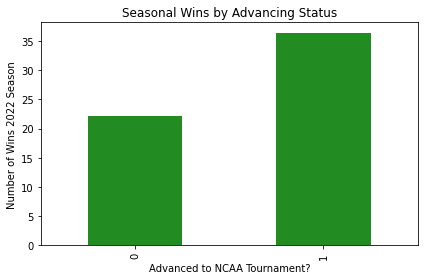

In [ ]:
# bar chart comparing wins and losses for teams that advanced and did not advance

# filtering dataframe to only teams that advanced to the NCAA tournament
advanced_status = softball_df4.groupby('advanced')

# number of wins
total_wins = advanced_status['win'].mean()

# plotting the data
wins_chart = total_wins.plot(kind='bar', title='Seasonal Wins by Advancing Status', color = 'forestgreen')
wins_chart.set_xlabel("Advanced to NCAA Tournament?")
wins_chart.set_ylabel("Number of Wins 2022 Season")

plt.tight_layout()
plt.show();

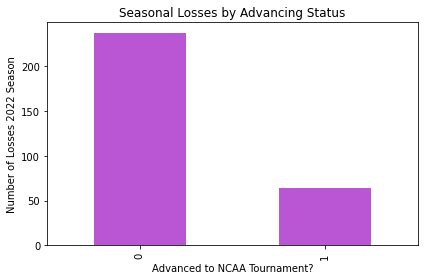

In [ ]:
# bar chart comparing wins and losses for teams that advanced and did not advance

# filtering dataframe to only teams that advanced to the NCAA tournament
advanced_status = softball_df4.groupby('advanced')

# number of wins
total_losses = advanced_status['conference'].count()

# plotting the data
wins_chart = total_losses.plot(kind='bar', title='Seasonal Losses by Advancing Status', color = 'mediumorchid')
wins_chart.set_xlabel("Advanced to NCAA Tournament?")
wins_chart.set_ylabel("Number of Losses 2022 Season")

plt.tight_layout()
plt.show();

### Plot Showing the Number of Teams Advancing by Conference

In [ ]:
# filtering dataframe only to teams that advanced
advanced_teams = softball_df4[softball_df4['advanced'] == 1]
advanced_teams

team     conference  sos  prev_sos  adj_rpi  adj_rpi_value  \
0             Tennessee            SEC    1         1       12        0.65470   
1                Oregon         Pac-12    2         2       17        0.63733   
2                   LSU            SEC    3         3       22        0.63004   
3               Clemson            ACC    4         5        8        0.66091   
4       Mississippi St.            SEC    5         4       30        0.60545   
6              Arkansas            SEC    7         7        4        0.67698   
7         Virginia Tech            ACC    8         8        2        0.70234   
8            Washington         Pac-12    9        12       16        0.64603   
9               Alabama            SEC   10         9        5        0.67448   
10            Minnesota        Big Ten   11        11       35        0.59616   
13             Missouri            SEC   14        18       18        0.63617   
14             Michigan        Big Ten   15        16       21        0.63053   
15            Texas A&M            SEC   16        15       40        0.58620   
16              Florida            SEC   17        14       13        0.65073   
19                Texas         Big 12   20        21       14        0.64840   
21             Kentucky            SEC   22        22       24        0.62516   
22         Oklahoma St.         Big 12   23        28        7        0.67102   
23          Arizona St.         Pac-12   24        24       10        0.65700   
24             Ole Miss            SEC   25        23       26        0.62045   
26         Georgia Tech            ACC   27        25       23        0.62766   
27             Ohio St.        Big Ten   28        30       25        0.62281   
30                 UCLA         Pac-12   31        27        6        0.67284   
31          Florida St.            ACC   32        35        3        0.69949   
32                 Duke            ACC   33        32        9        0.65930   
33         Northwestern        Big Ten   34        33       11        0.65526   
37             Stanford         Pac-12   38        40       31        0.60245   
38              Georgia            SEC   39        39       20        0.63115   
39           Oregon St.         Pac-12   40        36       37        0.59245   
40             Oklahoma         Big 12   41        42        1        0.70491   
42            Wisconsin        Big Ten   43        43       38        0.59223   
43                  UCF            AAC   44        45       15        0.64720   
44             Illinois        Big Ten   45        44       34        0.59716   
47             Nebraska        Big Ten   48        51       28        0.61260   
51              Arizona         Pac-12   52        53       43        0.58377   
56           Notre Dame            ACC   57        57       19        0.63407   
57          Wichita St.            AAC   58        58       36        0.59275   
58               Auburn            SEC   59        59       32        0.60189   
60              Liberty           ASUN   61        64       29        0.60762   
65            Louisiana       Sun Belt   66        69       27        0.61710   
70          North Texas          C-USA   71        75       47        0.57729   
72              McNeese      Southland   73        73       58        0.56231   
88        San Diego St.  Mountain West   89        89       49        0.57399   
96            Villanova       Big East   97       103       88        0.53621   
100            Campbell      Big South  101       106       74        0.55189   
101   Cal St. Fullerton       Big West  102       102       64        0.55613   
103          South Fla.            AAC  104       113       39        0.59109   
109        Missouri St.            MVC  110       126       85        0.54008   
110              Lehigh        Patriot  111       131       96        0.53247   
142            LMU (CA)            WCC  143       

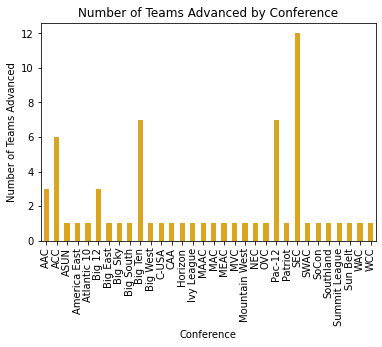

In [ ]:
# bar chart teams that advanced by conference
advanced_grouped = advanced_teams.groupby('conference')

# counting number of advancing teams
team_count = advanced_grouped['conference'].count()

# plotting the data
advanced_chart = team_count.plot(kind='bar', title='Number of Teams Advanced by Conference', color = 'goldenrod')
advanced_chart.set_xlabel("Conference")
advanced_chart.set_ylabel("Number of Teams Advanced")

#plt.tight_layout()
plt.show();

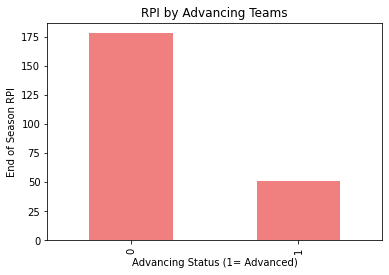

In [ ]:
# bar chart showing rpi by advancement status
advanced_teams = softball_df4.groupby('advanced')

# rpi
overall_rpi = advanced_teams['rpi'].mean()

# plotting the data
rpi_chart = overall_rpi.plot(kind='bar', title='RPI by Advancing Teams', color = 'lightcoral')
rpi_chart.set_xlabel("Advancing Status (1= Advanced)")
rpi_chart.set_ylabel("End of Season RPI")

plt.show();

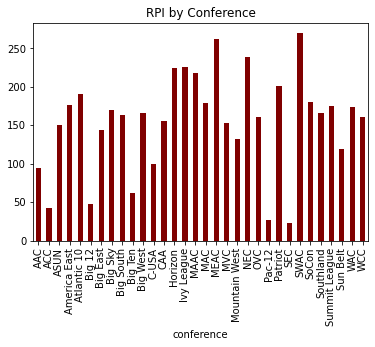

In [ ]:
# bar chart showing rpi by conference
conf_stats = softball_df4.groupby('conference')

# rpi
overall_sos = conf_stats['rpi'].mean()

# plotting the data
sos_chart = overall_sos.plot(kind='bar', title='RPI by Conference', color = 'maroon')
rpi_chart.set_xlabel("Conference")
rpi_chart.set_ylabel("End of Season RPI")

#plt.tight_layout()
plt.show();

### Scatterplot showing the relation between RPI, Wins, and Losses

In [ ]:
#computing the regression for rpi versus wins
#declaring x and y
total_rpi = softball_df4['rpi']
total_wins = softball_df4['win']

#performing the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(total_rpi, total_wins)

#obtaining regression values
regress_values = total_rpi * slope + intercept

#creating the equation string to be printed on the chart
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#printing the line
print(line_eq)

y = -0.1x +39.95


The r-value is: 0.7434440392902089


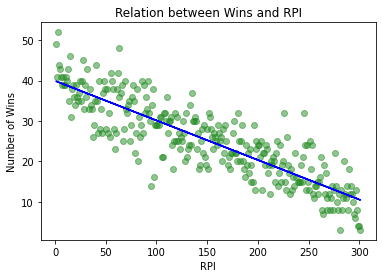

In [ ]:
# scatterplot showing relation between rpi and wins for all teams
x = softball_df4['rpi']
y = softball_df4['win']
plt.xlabel('RPI')
plt.ylabel('Number of Wins')
plt.title(f'Relation between Wins and RPI')

plt.scatter(x, y, color = 'forestgreen', alpha = 0.5)

#print r value for the correlation
plt.plot(total_rpi, regress_values,"b-")
print(f'The r-value is: {rvalue**2}')

plt.show()

In [ ]:
#computing the regression for rpi versus wins
#declaring x and y
total_rpi = softball_df4['rpi']
total_losses = softball_df4['loss']

#performing the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(total_rpi, total_losses)

#obtaining regression values
regress_values = total_rpi * slope + intercept

#creating the equation string to be printed on the chart
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#printing the line
print(line_eq)

y = 0.07x +14.05


The r-value is: 0.6054918590648568


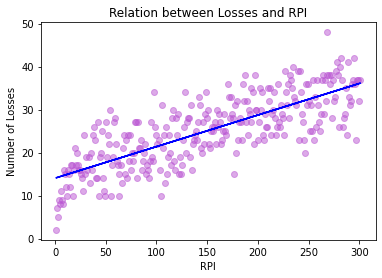

In [ ]:
# scatterplot showing relation between rpi and losses for all teams
x = softball_df4['rpi']
y = softball_df4['loss']
plt.xlabel('RPI')
plt.ylabel('Number of Losses')
plt.title(f'Relation between Losses and RPI')

plt.scatter(x, y, color = 'mediumorchid', alpha = 0.5)

#print r value for the correlation
plt.plot(total_rpi, regress_values,"b-")
print(f'The r-value is: {rvalue**2}')

plt.show()

## Preparing for SQL

In [ ]:
# saving cleaned_df to csv
softball_df4.to_csv("clean_softball.csv")

In [ ]:
# import dependencies
from sqlalchemy import create_engine
import psycopg2

In [ ]:
# establishing a connection string
rds_connection_string = "postgres:postgres@localhost:5432/wcws_2022"

engine = create_engine(f'postgresql://{rds_connection_string}')

In [ ]:
# obtaining table name
engine.table_names()

['softball']

In [ ]:
# adding dataframe to sql
softball_df4.to_sql(name='softball', con=engine, if_exists='append', index=False)


## Machine Learning-- Developing model to identify which teams were selected to advance to the 2022 NCAA tournament.

### Data Preprocessing

In [ ]:
# separating x and y datasets
X = softball_df4.drop('advanced',1)
y = softball_df4['advanced']

In [ ]:
# removing team name from x dataset
X = X.drop('team' ,1)
X

conference  sos  prev_sos  adj_rpi  adj_rpi_value  rpi  rpi_value  \
0              SEC    1         1       12        0.65470    9    0.64140   
1           Pac-12    2         2       17        0.63733   16    0.62193   
2              SEC    3         3       22        0.63004   20    0.61534   
3              ACC    4         5        8        0.66091   10    0.63921   
4              SEC    5         4       30        0.60545   29    0.59845   
5           Pac-12    6         6       45        0.57959   42    0.57679   
6              SEC    7         7        4        0.67698    4    0.66298   
7              ACC    8         8        2        0.70234    2    0.66874   
8           Pac-12    9        12       16        0.64603   14    0.62783   
9              SEC   10         9        5        0.67448    6    0.64928   
10         Big Ten   11        11       35        0.59616   37    0.57936   
11             ACC   12        10       95        0.53264   95    0.53124   
12          Big 12   13        13       92        0.53464   98    0.52764   
13             SEC   14        18       18        0.63617   22    0.61377   
14         Big Ten   15        16       21        0.63053   19    0.61793   
15             SEC   16        15       40        0.58620   38    0.57920   
16             SEC   17        14       13        0.65073   13    0.63043   
17             ACC   18        17       44        0.58323   46    0.57553   
18             SEC   19        19       50        0.57182   54    0.56202   
19          Big 12   20        21       14        0.64840   17    0.61900   
20             ACC   21        20       62        0.55949   59    0.55529   
21             SEC   22        22       24        0.62516   23    0.61256   
22          Big 12   23        28        7        0.67102   11    0.63882   
23          Pac-12   24        24       10        0.65700    7    0.64580   
24             SEC   25        23       26        0.62045   21    0.61415   
25          Pac-12   26        26       53        0.56840   50    0.56420   
26             ACC   27        25       23        0.62766   24    0.61226   
27         Big Ten   28        30       25        0.62281   26    0.60811   
28          Big 12   29        29       59        0.56153   58    0.55663   
29             ACC   30        31       84        0.54059   82    0.54059   
30          Pac-12   31        27        6        0.67284    5    0.65114   
31             ACC   32        35        3        0.69949    3    0.66589   
32             ACC   33        32        9        0.65930    8    0.64460   
33         Big Ten   34        33       11        0.65526   12    0.63356   
34             ACC   35        37       56        0.56368   52    0.56368   
35           C-USA   36        34       33        0.59851   39    0.57891   
36          Big 12   37        38       81        0.54708   79    0.54218   
37          Pac-12   38        40       31        0.60245   31    0.59265   
38             SEC   39        39       20        0.63115   25    0.61015   
39          Pac-12   40        36       37        0.59245   33    0.58685   
40          Big 12   41        42        1        0.70491    1    0.67201   
41           C-USA   42        41       75        0.55084   74    0.54664   
42         Big Ten   43        43       38        0.59223   44    0.57613   
43             AAC   44        45       15        0.64720   15    0.62270   
44         Big Ten   45        44       34        0.59716   35    0.58106   
45             WCC   46        45      111        0.51580  128    0.50460   
46         Big Ten   47        47      102        0.52832  105    0.52132   
47         Big Ten   48        51       28        0.61260   27    0.60490   
48             AAC   49        48       77        0.54922   80    0.54082   
49             AAC   50        52      114        0.51334  116    0.51194   
50        Sun Belt   51        49       67        0.55484   67    0.55134   
51  

In [ ]:
# one-hot encoding for categorical variables
categorical_variable = ['conference']
                
for variable in categorical_variable:
  discarded= pd.get_dummies(X[variable], prefix=variable)
  X= pd.concat([X, discarded], axis = 1)
  X.drop([variable], axis=1, inplace=True)

#viewing the updated dataframe with one-hot encoding
X

sos  prev_sos  adj_rpi  adj_rpi_value  rpi  rpi_value  adj_non_conf_rpi  \
0      1         1       12        0.65470    9    0.64140                16   
1      2         2       17        0.63733   16    0.62193                 5   
2      3         3       22        0.63004   20    0.61534                22   
3      4         5        8        0.66091   10    0.63921                13   
4      5         4       30        0.60545   29    0.59845                36   
5      6         6       45        0.57959   42    0.57679                49   
6      7         7        4        0.67698    4    0.66298                12   
7      8         8        2        0.70234    2    0.66874                 3   
8      9        12       16        0.64603   14    0.62783                10   
9     10         9        5        0.67448    6    0.64928                 4   
10    11        11       35        0.59616   37    0.57936                28   
11    12        10       95        0.53264   95    0.53124                71   
12    13        13       92        0.53464   98    0.52764                78   
13    14        18       18        0.63617   22    0.61377                23   
14    15        16       21        0.63053   19    0.61793                24   
15    16        15       40        0.58620   38    0.57920                40   
16    17        14       13        0.65073   13    0.63043                15   
17    18        17       44        0.58323   46    0.57553                42   
18    19        19       50        0.57182   54    0.56202                34   
19    20        21       14        0.64840   17    0.61900                 8   
20    21        20       62        0.55949   59    0.55529                55   
21    22        22       24        0.62516   23    0.61256                25   
22    23        28        7        0.67102   11    0.63882                 7   
23    24        24       10        0.65700    7    0.64580                27   
24    25        23       26        0.62045   21    0.61415                26   
25    26        26       53        0.56840   50    0.56420                59   
26    27        25       23        0.62766   24    0.61226                18   
27    28        30       25        0.62281   26    0.60811                20   
28    29        29       59        0.56153   58    0.55663                57   
29    30        31       84        0.54059   82    0.54059                73   
30    31        27        6        0.67284    5    0.65114                 9   
31    32        35        3        0.69949    3    0.66589                 2   
32    33        32        9        0.65930    8    0.64460                14   
33    34        33       11        0.65526   12    0.63356                 6   
34    35        37       56        0.56368   52    0.56368               109   
35    36        34       33        0.59851   39    0.57891                19   
36    37        38       81        0.54708   79    0.54218                64   
37    38        40       31        0.60245   31    0.59265                35   
38    39        39       20        0.63115   25    0.61015                17   
39    40        36       37        0.59245   33    0.58685                31   
40    41        42        1        0.70491    1    0.67201                 1   
41    42        41       75        0.55084   74    0.54664                74   
42    43        43       38        0.59223   44    0.57613                33   
43    44        45       15        0.64720   15    0.62270                11   
44    45        44       34        0.59716   35    0.58106                38   
45    46        45      111        0.51580  128    0.50460                90   
46    47        47      102        0.52832  105    0.52132                53   
47    48        51       28        0.61260   27    0.60490                44   
48    49        48       77        0.54922   80    0.54082                63   
49   

In [ ]:
# double checking the data type
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sos                       301 non-null    int64  
 1   prev_sos                  301 non-null    int64  
 2   adj_rpi                   301 non-null    int64  
 3   adj_rpi_value             301 non-null    float64
 4   rpi                       301 non-null    int64  
 5   rpi_value                 301 non-null    float64
 6   adj_non_conf_rpi          301 non-null    int64  
 7   conf_rpi                  301 non-null    int64  
 8   nc_sos                    301 non-null    int64  
 9   nc_sos_value              301 non-null    float64
 10  win                       301 non-null    int64  
 11  loss                      301 non-null    int64  
 12  road_win                  301 non-null    int64  
 13  road_loss                 301 non-null    int64  
 14  last_10_wi

### Supervised Learning Models

In [ ]:
# perform train/test split on the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Using Random Forest Classifier for Dimensionality Reduction

In [ ]:
# fit Random Forest model for dimensionality reduction
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8552631578947368


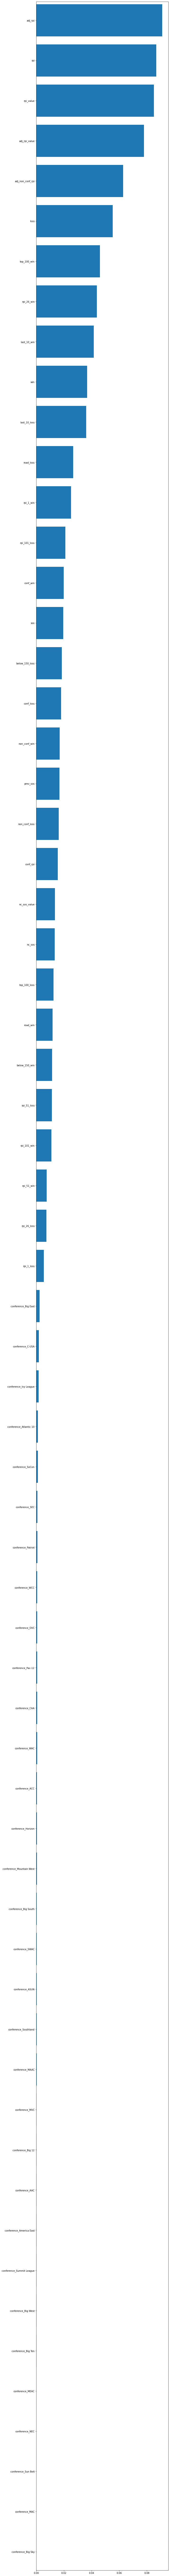

In [ ]:
# plotting the features to determine their importance in the model
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda y: y[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,200)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)
plt.show()

Supervised Learning Model Retaining All Features

In [ ]:
# create the logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [ ]:
#scaling the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# train the model using the training data
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# generating our predictions
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Prediction  Actual
177           0       0
289           0       0
228           0       0
198           0       0
60            1       1
9             1       1
118           0       0
154           1       1
164           0       0
33            1       1
5             1       0
116           0       0
45            0       0
173           0       0
230           0       1
46            0       0
124           0       0
97            0       0
158           0       0
101           0       1
168           0       0
267           0       1
240           0       0
25            1       0
144           0       0
246           0       0
251           0       0
73            0       0
109           0       1
108           0       0
137           0       0
282           0       0
163           0       0
42            0       1
17            0       0
266           0       0
76            0       0
90            0       0
24            1       1
57            1       1
92            0       0
77            0       0
290           0       0
167           0       0
7             1       1
140           0       0
279           0       1
78            0       0
248           0       0
229           0       0
224           0       0
104           0       0
63            0       0
82            0       0
223           0       0
275           0       0
234           0       0
296           0       0
281           0       0
285           0       0
182           0       0
184           0       0
132           1       0
194           0       0
75            0       0
111           0       0
59            1       0
93            0       0
6             1       1
175           0       0
30            1       1
22            1       1
286           0       0
56            1       1
239           0       0
113           0       0

In [ ]:
# validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9733333333333334
Testing Data Score: 0.868421052631579


In [ ]:
# generate confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_pred)
cm

array([[55,  4],
       [ 6, 11]])

In [ ]:
# generate classification report for logistic regression
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        59
           1       0.73      0.65      0.69        17

    accuracy                           0.87        76
   macro avg       0.82      0.79      0.80        76
weighted avg       0.86      0.87      0.87        76



Supervised Learning Model With Only Selected Features

In [ ]:
# import and fit SelectFromModel
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=42))

In [ ]:
# Use selector to transform X
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=42)

#scaling the data
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [ ]:
# fit the logistic regression model
classifier2 = LogisticRegression()
classifier2

LogisticRegression()

In [ ]:
# fit the model to reduced, scaled datset
classifier2.fit(X_selected_train_scaled, y_train)


LogisticRegression()

In [ ]:
# generating our predictions
predictions = classifier2.predict(X_selected_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Prediction  Actual
177           0       0
289           0       0
228           0       0
198           0       0
60            1       1
9             1       1
118           0       0
154           1       1
164           0       0
33            1       1
5             1       0
116           0       0
45            0       0
173           0       0
230           1       1
46            0       0
124           0       0
97            0       0
158           0       0
101           0       1
168           0       0
267           0       1
240           0       0
25            0       0
144           0       0
246           0       0
251           0       0
73            0       0
109           1       1
108           0       0
137           0       0
282           0       0
163           0       0
42            1       1
17            0       0
266           0       0
76            1       0
90            0       0
24            1       1
57            1       1
92            0       0
77            0       0
290           0       0
167           0       0
7             1       1
140           0       0
279           1       1
78            1       0
248           0       0
229           0       0
224           0       0
104           0       0
63            0       0
82            0       0
223           0       0
275           0       0
234           0       0
296           0       0
281           0       0
285           0       0
182           0       0
184           0       0
132           1       0
194           0       0
75            0       0
111           0       0
59            0       0
93            0       0
6             1       1
175           0       0
30            1       1
22            1       1
286           0       0
56            1       1
239           0       0
113           0       0

In [ ]:
# validate the model using the test data
print(f"Training Data Score: {classifier2.score(X_selected_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier2.score(X_selected_test_scaled, y_test)}")

Training Data Score: 0.9244444444444444
Testing Data Score: 0.9210526315789473


In [ ]:
# generate confusion matrix for logistic regression
y_true = y_test
y_pred = classifier2.predict(X_selected_test_scaled)
cm = confusion_matrix(y_true, y_pred)
cm

array([[55,  4],
       [ 2, 15]])

In [ ]:
# generate classification report for logistic regression
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        59
           1       0.79      0.88      0.83        17

    accuracy                           0.92        76
   macro avg       0.88      0.91      0.89        76
weighted avg       0.93      0.92      0.92        76



The model does perform better after the dimensionality reduction, using Random Forest Classifier. Now, we can consider additional methods for optimization.

Supervised Learning: Linear SVC

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC())])

In [ ]:
# Grid search to determine the value of C
param_grid = {'SVC__C':np.arange(0.01,100,10)}
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
linearSVC.fit(X_selected_train_scaled,y_train)
print(linearSVC.best_params_)

{'SVC__C': 30.01}


In [ ]:
# validate the model using the test data
print(f"Training Data Score: {bestlinearSVC.score(X_selected_train_scaled, y_train)}")
print(f"Testing Data Score: {bestlinearSVC.score(X_selected_test_scaled, y_test)}")

Training Data Score: 0.9377777777777778
Testing Data Score: 0.881578947368421


In [ ]:
# generate confusion matrix for SVC
y_true = y_test
y_pred = bestlinearSVC.predict(X_selected_test_scaled)
cm = confusion_matrix(y_true, y_pred)
cm

array([[51,  8],
       [ 1, 16]])

In [ ]:
# generate classification report for logistic regression
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        59
           1       0.67      0.94      0.78        17

    accuracy                           0.88        76
   macro avg       0.82      0.90      0.85        76
weighted avg       0.91      0.88      0.89        76



The SVC model does not perform better than the logistic regression model post-dimensionality reduction.

### Deep Learning Model

In [ ]:
# importing dependencies
import sklearn as skl
import tensorflow as tf

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=64))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
# import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


In [ ]:
# run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 02s]
val_accuracy: 0.8552631735801697

Best val_accuracy So Far: 0.8947368264198303
Total elapsed time: 00h 02m 09s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# obtain best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 11,
 'num_layers': 4,
 'tuner/bracket': 0,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/round': 0,
 'units_0': 11,
 'units_1': 11,
 'units_2': 21,
 'units_3': 16,
 'units_4': 1}

In [ ]:
# define the deep learning model
nn_model2 = tf.keras.models.Sequential()

# adding four layers for the optimal number of layers
# using tanh actiivation since it is the most optimal activation
nn_model2.add(tf.keras.layers.Dense(units=11, activation="tanh", input_dim=64))
nn_model2.add(tf.keras.layers.Dense(units=21, activation="tanh"))
nn_model2.add(tf.keras.layers.Dense(units=16, activation="tanh"))
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Compile the model
nn_model2.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
# train the model 
fit_model = nn_model2.fit(X_train_scaled, y_train, epochs = 50)

Epoch 1/50
8/8 [==============================] - 1s 4ms/step - loss: 0.6615 - accuracy: 0.6356
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5898 - accuracy: 0.7556
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5413 - accuracy: 0.8178
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5039 - accuracy: 0.8356
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.8489
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.4351 - accuracy: 0.8578
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8667
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 0.3800 - accuracy: 0.8889
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.8978
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.3292 - accuracy: 0.8889
Epoch 11/50
8/8 [======================

In [ ]:
# evaluating model accuracy
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled, y_test ,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.3038 - accuracy: 0.8553 - 126ms/epoch - 42ms/step
Loss: 0.3038225769996643, Accuracy: 0.8552631735801697


This deep learning model is less accurate than our logistic regression model post-dimensionality reduction.